In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tested.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
# 1 . Encode the Sex and Embarked features using the OneHotEncoder

In [8]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Sex_encoder = encoder.fit_transform(data[['Sex']])
encoded_sex = pd.DataFrame(Sex_encoder.toarray(), columns=['Female', 'Male'])
Embarked_encoder = encoder.fit_transform(data[['Embarked']])
encoded_embarked = pd.DataFrame(Embarked_encoder.toarray(), columns=['C', 'Q', 'S'])
data.drop(columns=['Sex', 'Embarked'], inplace=True)
titanic_data = pd.concat([data.reset_index(drop=True), encoded_sex, encoded_embarked], axis=1)

In [11]:
titanic_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,C,Q,S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,0.0,1.0,0.0,0.0,1.0


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Female           0
Male             0
C                0
Q                0
S                0
dtype: int64

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [14]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [15]:
columns = ['Name',  'Ticket', 'Cabin']
titanic_data.drop(columns, axis=1, inplace=True)

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Female       418 non-null    float64
 8   Male         418 non-null    float64
 9   C            418 non-null    float64
 10  Q            418 non-null    float64
 11  S            418 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 39.3 KB


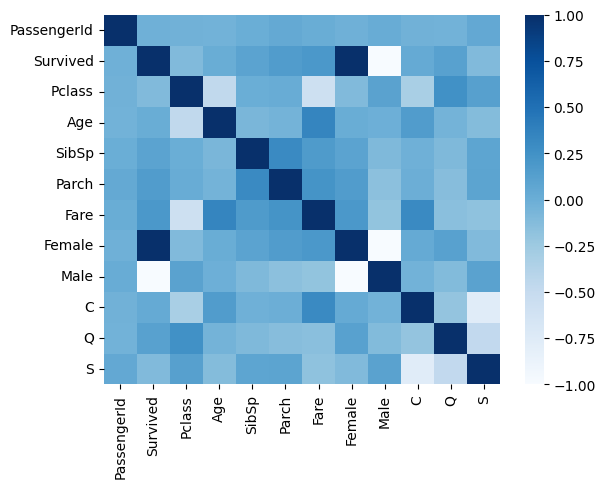

In [17]:
sns.heatmap(titanic_data.corr(), cmap='Blues')
plt.show()

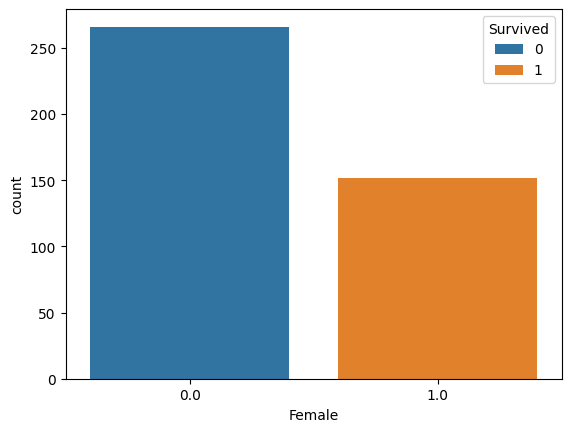

In [18]:
sns.countplot(x="Female", hue="Survived", data=titanic_data)
plt.show()

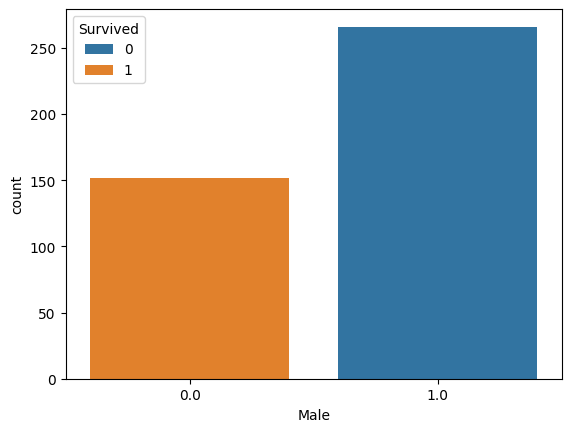

In [19]:
sns.countplot(x="Male", hue="Survived", data=titanic_data)
plt.show()

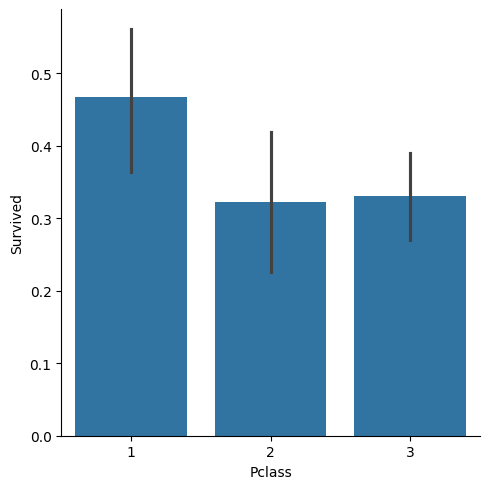

In [20]:
sns.catplot(x="Pclass", y="Survived", data=titanic_data, kind='bar')
plt.show()

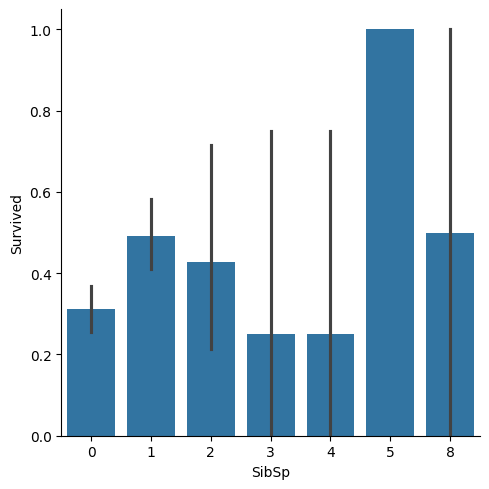

In [21]:
sns.catplot(x="SibSp", y="Survived", data=titanic_data, kind='bar')
plt.show()

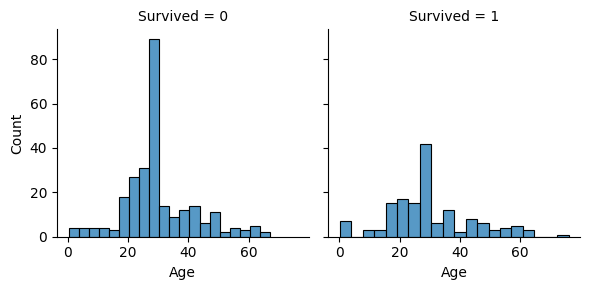

In [22]:
Age = sns.FacetGrid(titanic_data, col="Survived")
Age.map(sns.histplot, "Age", bins=20)
plt.show()

In [23]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.4, random_state=42)

In [26]:
print(X_train.shape)  # To check the shape of the array
print(X_train.dtype)

(250, 11)
float64


In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print ('accuracy :', accuracy_score(y_test, y_pred))
print ('Classification report:', classification_report(y_test, y_pred))
print ('Confusion Matrix:', confusion_matrix(y_test, y_pred))

accuracy : 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        61

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Confusion Matrix: [[107   0]
 [  0  61]]


In [30]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

[1. 1. 1. 1. 1.]
1.0


In [31]:
final_data = pd.DataFrame({'Predictions':y_pred})
final_data.to_csv('Predictions', index=False)

In [32]:
final_data

,Predictions
0,0
1,1
2,0
3,0
4,1
...,...
163,1
164,1
165,0
166,1


In [39]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X, y)
class_names = list(map(str, y.unique()))
dot_data = export_graphviz(
    classifier, 
    out_file=None,
    feature_names=X.columns,
    class_names=class_names,
    filled=True, 
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data, filename="decision_tree", format="png", engine='dot')

# Save or display the graph
graph.render(filename='regressor', format='png', cleanup=True)

'regressor.png'

In [40]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std,train_mean - train_std ,alpha=0.15,color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

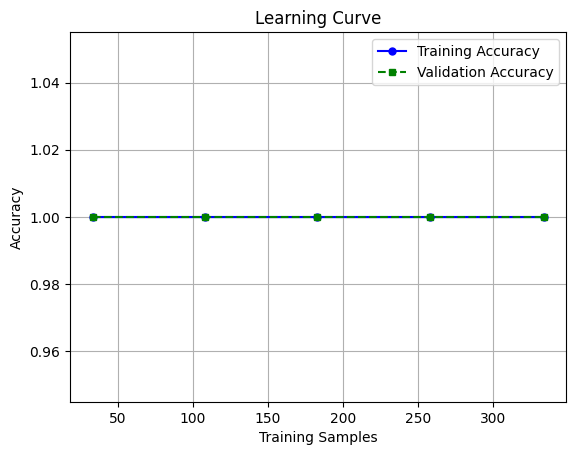

In [41]:
plot_learning_curve(classifier, X, y)